# Finding Strongly Connected Components of a Directed Graph
## 1. Execution
The program can be executed by following command. The program has been developed and runned with python 3.10.4. The program consists of "hw3.py", "DirectedGraph.py", "Vertex.py", "LinkedList.py", "ListNode.py".

In [ ]:
python hw3.py input/input.txt input/adj_mat.txt adj_mat
python hw3.py input/input.txt input/adj_mat.txt adj_list
python hw3.py input/input.txt input/adj_mat.txt adj_arr

## 2. Experiment
I made various inputs of various sizes and sparsities. I made [500, 1500, 2500] vertices and for each vertices, randomly created possible edge with density of [0.25, 0.5, 075]. The following is the program I used to make sample inputs.

In [ ]:
import argparse
import random

random.seed(123)

def main(args):
    numV = int(args.numV)
    with open(args.outputPath, 'w') as f:
        f.write(args.numV + "\n")

        for i in range(1, numV + 1):
            adj = []
            for j in range(1, numV +1):
                if i != j and random.random() < float(args.density):
                    adj.append(j)
        
            numE = len(adj)
            line = str(numE)
            if numE == 0:
                line += "\n"
            else:
                for k in range(numE):
                    line = line + " " + str(adj[k])

                if i != numV:
                    line += "\n"
            f.write(line)

if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='Make input directed graph.')
    parser.add_argument('numV')
    parser.add_argument('density')
    parser.add_argument('outputPath')
    args = parser.parse_args()
    main(args)

### 1) #Vertices = 1500, Density  = [0.25, 0.5, 0.75]

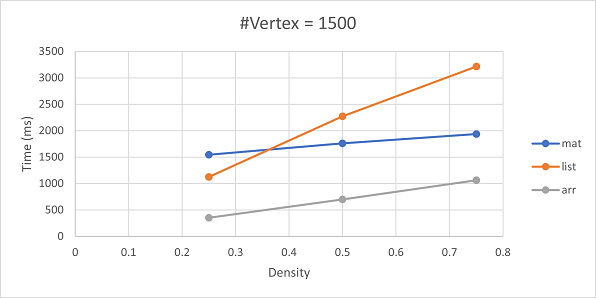

In [6]:
from IPython.display import Image
Image(filename='figure1.png')

Note that when the edges are sparse, matrix is worse than list. However, the denser the edges are, the better matrix becomes than list. Array is always the best among them.

### 2) #Vertices = 2500, Density  = [0.25, 0.5, 0.75]

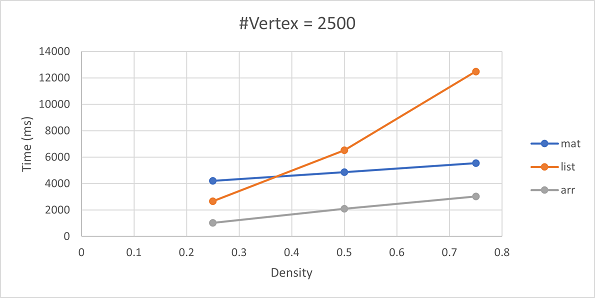

In [13]:
Image(filename='figure2.png')

The same phenomenon occurs when the number of vertices gets larger.

### 3) #Vertices = [500, 1500, 2500], Density = 0.25

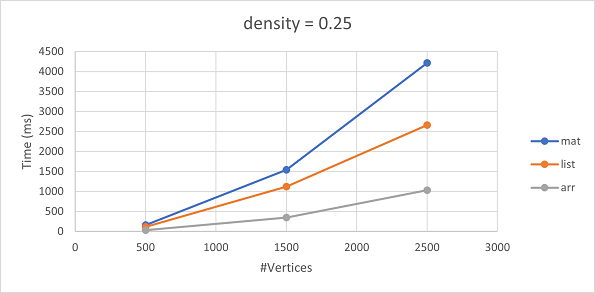

In [14]:
Image(filename='figure3.png')

Note that the execution time with list and array increase almost lineary, while the execution time with matirx increases faster than linearly. In this case, matrix is worse than list since the density is sparse.

### 4) #Vertices = [500, 1500, 2500], Density = 0.75

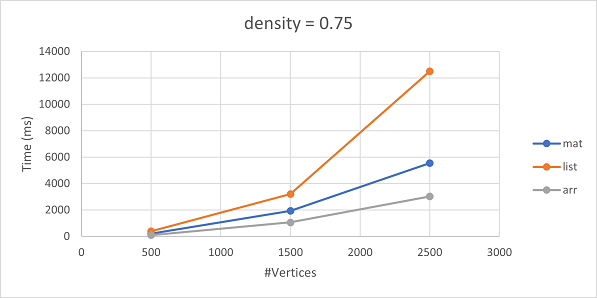

In [16]:
Image(filename='figure4.png')

In this case, the order of matrix and list is reversed. It's becasue the edges are dense, which is the case we have seen above.

## 3. Discussion
We can see the program with adjacency array is the best in most cases. It is because we can quickly access to each vertices and edges with index. Despite the program with adjacency linked list has the same time complexity, adding to linked list and traveling linked list are more expensive operations than array operations.

With list and array, finding SCC has time complexity of $O(|V|+|E|)$, which is shown in above figure. However, with matrix, we cannot meet such complexity. When finding adjacent vertices of a vertex, we have to see all columns elements of particular row of matrix, which makes the time complexity $O(|V|^2)$. This property seems to be reflected in above figure 3.

Nevertheless, we have seen matrix is better than list when the edges are dense. Its because dense edges mean $|E| = \Theta(|V|^2)$, which makes the time complexity of finding SCC $O(|V|+|E|) = O(|V|^2)$. Hence, even with list and arr, The complexity becomes $O(|V|^2)$.

Actually, Since I have made all possible V(V-1) number with probability d, the all graphs in figure 3 and 4 orignially quadratic. If the generator program is modified to make constant number of edges, the complexity graph with list and array would seem linear.